In [ ]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization
from keras.utils import np_utils
import numpy as np

In [ ]:
train_data = np.loadtxt('train_data.csv', delimiter=",")
test_data = np.loadtxt('test_data.csv', delimiter=",")
train_label = np.loadtxt('trian_label.csv', delimiter=",")
test_label = np.loadtxt('test_label.csv', delimiter=",")

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)

In [ ]:
train_data = train_data.reshape((train_data.shape[0], 1, train_data.shape[1]))
test_data = test_data.reshape((test_data.shape[0], 1, test_data.shape[1]))

In [ ]:
#train_label = np_utils.to_categorical(train_label)
#test_label = np_utils.to_categorical(test_label)
print(train_data.shape,train_label.shape, test_data.shape, test_label.shape)

(382000, 1, 8) (382000,) (76400, 1, 8) (76400,)


In [ ]:
model = Sequential()
#model.add(LSTM(64, input_shape=(1, 8),activation='tanh', recurrent_activation='sigmoid',return_sequences=True, return_state=False))
#model.add(BatchNormalization())
model.add(LSTM(24, input_shape=(1, 8),activation='tanh', recurrent_activation='sigmoid')) 
model.add(BatchNormalization())
#model.add(LSTM(12, activation='tanh', recurrent_activation='sigmoid'))
#model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 24)                3168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24)                96        
_________________________________________________________________
dense_4 (Dense)              (None, 64)                1600      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 7,217
Trainable params: 7,169
Non-trainable params: 48
___________________________________________________

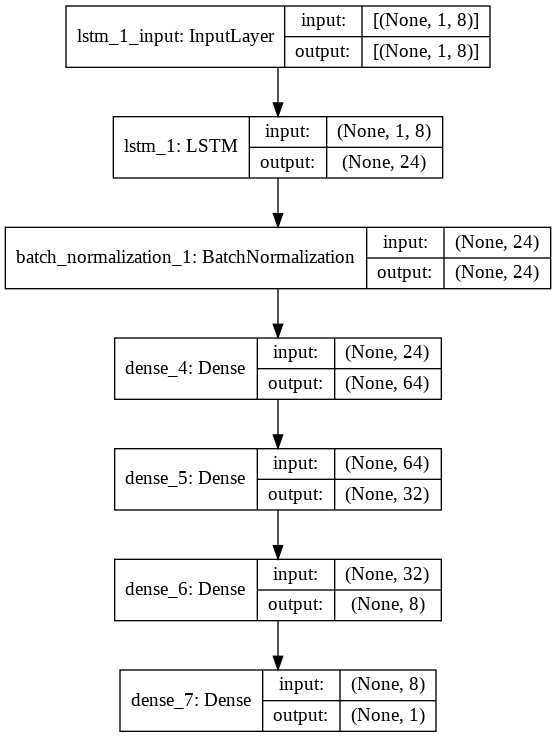

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(train_data, train_label, epochs=1, batch_size=5, validation_data=(test_data, test_label), verbose=2, shuffle=False)

76400/76400 - 198s - loss: 0.1571 - accuracy: 0.9417 - val_loss: 3.8640 - val_accuracy: 0.8717


In [ ]:
test_accuracy = model.evaluate(test_data, test_label)

2388/2388 [==============================] - 7s 3ms/step - loss: 3.8640 - accuracy: 0.8717


In [ ]:
im_data = np.loadtxt('im_1.csv', delimiter=",")
no_data = np.loadtxt('no_1.csv', delimiter=",")
im_data = im_data.reshape((im_data.shape[0], 1, im_data.shape[1]))
no_data = no_data.reshape((no_data.shape[0], 1, no_data.shape[1]))
print(no_data.shape, im_data.shape)

(200, 1, 8) (1000, 1, 8)


In [ ]:
y = model.predict_classes(test_data, batch_size=1, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


ValueError: ignored

In [ ]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    